In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from scipy.misc import factorial
import random
%matplotlib inline

In [2]:
class ProbabilisticCClustering(object):
    def __init__(self):
        self.m=2
        self.m_assignation = None
    
    def initialize(self,data):
        self.m_centers=[]
        self.shape = data.shape[1]
        for i in range(self.cluster_nr):
            self.m_centers.append(np.random.uniform(data.min(0), data.max(0)))
        self.m_centers = np.array(self.m_centers)
        self.m_assignation = np.random.uniform(0, 1, (self.cluster_nr, len(data)))
        self.A = self.matrix(data)
        
    def fit(self, data, cluster_nr):
        data = np.array(data)
        self.cluster_nr = cluster_nr
        self.initialize(data)
        for j in range(10):
            for k in range(len(data)):
                for i in range(self.cluster_nr):
                    self.m_assignation[i,k] = self.assignation(data[k], i, data)
            self.A = self.matrix(data)
            for i in range(self.cluster_nr):
                self.m_centers[i] = self.new_center(i, data)
            print(self.m_centers,end='\r')
        return self.m_assignation
    
    def assignation(self, k, i, data):  
        counter=self.mahalanobis_distance(k, self.m_centers[i])
        fractor = (counter/self.pos_distribution(i, data)).item(0)**(2/(self.m-1))
        return 1/(1+fractor)
    
    def new_center(self, i, data):
        counter=0
        denominator=0
        for k in range(len(data)):
            counter+= (self.m_assignation[i,k]**self.m)*data[k]
            denominator+= (self.m_assignation[i,k]**self.m)
        return counter/denominator
            
    def pos_distribution(self, i,data):
        counter=0
        denominator=0
        for k in range(len(data)):
            counter+= ((self.m_assignation[i,k])**(self.m))*(self.mahalanobis_distance(data[k],self.m_centers[i])**2)
            denominator+=(self.m_assignation[i,k])**(self.m)
        return counter/denominator
    
    def matrix(self, data):
        A = [0] * self.m_assignation.shape[1]
        for i in range(self.m_assignation.shape[1]):
            A[i] = np.cov(data, rowvar=False)
        return A
    
    def mahalanobis_distance(self, x,y): #A - metryka
        tmp = x-y
        A = np.linalg.inv(self.A)
        return (tmp @ A @ tmp).item(0)**0.5 
    
    def fuzzy_assignation(self, k, i):  
        u_ik=0
        counter = self.mahalanobis_distance(k, i)
        for j in self.m_centers:
            denominator = self.mahalanobis_distance(k, j)
            fractor = (counter/denominator)**(2/(self.m-1))
            u_ik+=fractor
        return (1/u_ikdistance)

(210, 2)


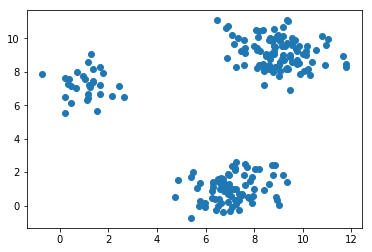

In [7]:
#this fragment is for testing my class and it was taken from outside sources

k = 2
sizes = [100, 30, 80]

m = [None]*len(sizes)
m[0] = [ 9, 9] #[0, 1, 3, 4, 1]
m[1] = [ 1, 7] #[0,-1, 3, 1, 3]
m[2] = [ 7, 1] #[5, 0, 0, 1,-1]

cm = []
for _ in range(len(sizes)):
    cm.append(np.random.uniform(-1, 1, (k, k)))
    cm[-1] = (cm[-1] @ cm[-1].T + np.identity(k))/2

clusters = []
for i in range(len(sizes)):
    clusters.append(np.random.multivariate_normal(m[i], cm[i], sizes[i]))

x = np.concatenate(clusters)
y = np.zeros([len(sizes), np.sum(sizes)])
_y = []
for i in range(len(sizes)):
    _y += [i]*sizes[i]
y[np.array(_y), np.arange(np.sum(sizes))] = 1
perm = np.random.permutation(x.shape[0])
x = x[perm]
y = y.T[perm].T
print(x.shape)

plt.plot(x[:,0], x[:,1], 'o')

In [4]:
prob= ProbabilisticCClustering()
prob.fit(x, 3)

[[ 7.35714299  4.73130459]
 [ 7.43806531  5.0226073 ]
[[ 7.72690111  4.96260159]]
 [ 7.80112362  5.3591159 ]
[[ 7.90877857  5.29773636]]
 [ 8.04664745  5.8369401 ]
[[ 8.07454258  5.80084999]]
 [ 8.29684958  6.57421259]
[[ 8.29856726  6.54382409]]
 [ 8.63060432  7.6583564 ]
[[ 8.62400808  7.62443985]]
 [ 8.86041854  8.5320221 ]
[[ 8.85996945  8.52203934]]
 [ 8.97682251  8.70675245]
[[ 8.97704842  8.70283849]]
 [ 9.08652636  8.66617749]
[[ 9.08440324  8.6656584 ]]
 [ 9.21017269  8.71946514]
[[ 9.21222319  8.72236387]]
 [ 9.20759716  8.67214868]


array([[  1.18407611e-06,   1.62840335e-05,   2.59612569e-05,
          2.54733032e-06,   1.00215819e-06,   2.94439828e-06,
          2.53766190e-06,   9.81340827e-06,   2.00366363e-06,
          1.16085525e-02,   4.72692451e-04,   8.09307646e-06,
          2.43351412e-06,   2.91352748e-05,   3.36128442e-04,
          2.30529705e-04,   9.63962476e-07,   2.38826607e-06,
          1.66585110e-06,   6.59040599e-05,   6.58814757e-05,
          2.07843403e-05,   2.98337776e-04,   2.81764788e-05,
          6.99337814e-07,   6.78037568e-05,   1.56102765e-05,
          6.20773485e-07,   2.99455255e-07,   6.88141023e-06,
          3.40352468e-05,   9.60881773e-06,   4.64672059e-07,
          6.74899237e-06,   4.31771406e-07,   1.86163188e-07,
          3.45851518e-05,   7.07538418e-06,   3.58960878e-07,
          1.49580638e-07,   1.70256779e-07,   3.08489388e-07,
          8.84981427e-06,   2.06917134e-06,   3.24988380e-07,
          2.32415545e-07,   4.05520546e-07,   3.32249971e-07,
        

In [5]:
prob.m_centers

array([[ 9.21222319,  8.72236387],
       [ 9.20759716,  8.67214868],
       [ 9.22898815,  8.71633842]])